In [3]:
import pandas as pd
df = pd.read_csv('loan_approval_dataset.csv')
print(df.shape)
df.head()

(4269, 13)


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [7]:
df.isnull().sum()

,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0
luxury_assets_value,0


In [10]:
print(df.columns.tolist())

[' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


In [13]:
df.columns = df.columns.str.strip()

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

label_cols = ['no_of_dependents', 'education', 'self_employed', 'loan_status']
for col in label_cols:
  df[col] = le.fit_transform(df[col])

In [15]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [16]:
from sklearn.model_selection import train_test_split

X = df.drop('loan_status', axis = 1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_test)
print(f"Accuracy:", accuracy_score(y_test, y_pred))
print(f"Classification:", classification_report(y_test, y_pred))
print(f"confusion matrix:", confusion_matrix(y_test, y_pred))

Accuracy: 0.7985948477751756
Classification:               precision    recall  f1-score   support

           0       0.80      0.91      0.85       536
           1       0.80      0.61      0.69       318

    accuracy                           0.80       854
   macro avg       0.80      0.76      0.77       854
weighted avg       0.80      0.80      0.79       854

confusion matrix: [[488  48]
 [124 194]]


In [20]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))

Accuracy: 0.977751756440281

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       536
           1       0.98      0.96      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854

Confusion Matrix:
 [[529   7]
 [ 12 306]]


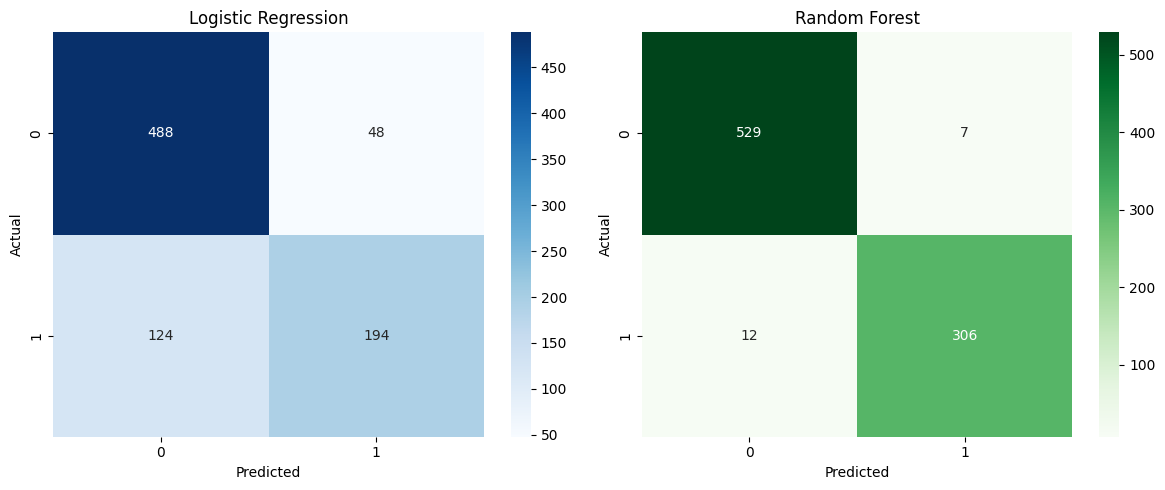

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Replace these with your actual predictions if rerunning from scratch
log_cm = np.array([[488, 48],
                   [124, 194]])

rf_cm = np.array([[529, 7],
                  [12, 306]])

# Set up subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression Confusion Matrix
sns.heatmap(log_cm, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title("Logistic Regression")
axs[0].set_xlabel("Predicted")
axs[0].set_ylabel("Actual")

# Random Forest Confusion Matrix
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens', ax=axs[1])
axs[1].set_title("Random Forest")
axs[1].set_xlabel("Predicted")
axs[1].set_ylabel("Actual")

plt.tight_layout()
plt.savefig("confusion_matrices.png")  # optional: saves the image
plt.show()
